In [1]:
suppressMessages(library(car))

# Multiple Linear Regression
As a final topic for this lesson, we are going to take everything we have discussed so far and generalise it to cases where there is *more than one* predictor variable. This expands the *simple* regression model to a *multiple* regression model. Although this will add complexity, the nice thing about muliple regression is that the vast majority of ideas from simple regression still apply. Indeed, simple regression is really a *special case* of multiple regression when $k=1$.

## Fitting a *Plane* to Data
We started this lesson with an informal description of simple regression as a means of fitting a straight line through a cloud of data points. Mutliple regression differs only in the fact that we are now fitting a *multidimensional plane* through a cloud of data points. The number of dimensions is $k$, which corresponds to the number of predictor variables. The simplest case of multiple regression is therefore $k = 2$. 

As an example, consider plotting `mpg` against *two* predictors: `wt` and `hp` (horsepower). Each predictor defines a new dimension, leading to the plot shown below. Make sure you spend some time rotating this so you get a sense of how we are able to view the relationships within the data relative to *both* predictors simultaneously.

In [2]:
# Load rgl package
library(rgl)

# Use the mtcars dataset
data(mtcars)

# Open 3D window
open3d()

# Extract the variables
x <- mtcars$wt   # x-axis
y <- mtcars$hp   # y-axis
z <- mtcars$mpg  # z-axis

# Create a 3D scatter plot
plot3d(x, y, z,
       xlab = "Weight",
       ylab = "Horsepower",
       zlab = "MPG",
       col = "skyblue",
       size = 2,
       type = "s")  # 's' for spheres


glX 
  1 

In [3]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

Earlier we argued that the simplest means of capturing a relationship within a single dimension was to draw a straight line. We can generalise this argument into two dimensions by drawing a *flat plane*. This is like placing a piece of paper within the 3D cloud of points, as visualised below. Again, rotate this plot around to get a sense of how the plane relates to the data. Notice as well that when viewed from a single dimension, the plane becomes a *line*.

In [4]:
# Load the rgl package
library(rgl)

# Use the mtcars dataset
data(mtcars)

# Define axes
x <- mtcars$wt   # x-axis
y <- mtcars$hp   # y-axis
z <- mtcars$mpg  # z-axis

# Fit a linear model: mpg ~ wt + hp
model <- lm(mpg ~ wt + hp, data = mtcars)

# Open 3D window
open3d()

# Create a 3D scatter plot
plot3d(x, y, z,
       xlab = "Weight",
       ylab = "Horsepower",
       zlab = "MPG",
       col = "skyblue",
       size = 2,
       type = "s")

# Create a grid over wt and hp to evaluate the plane
wt_vals <- seq(min(x), max(x), length.out = 20)
hp_vals <- seq(min(y), max(y), length.out = 20)
grid <- expand.grid(wt = wt_vals, hp = hp_vals)

# Predict mpg over the grid using the model
grid$mpg <- predict(model, newdata = grid)

# Reshape the predicted values into a matrix for the surface
mpg_matrix <- matrix(grid$mpg, nrow = length(wt_vals), ncol = length(hp_vals))

# Draw the regression plane
surface3d(wt_vals, hp_vals, mpg_matrix,
          color = "orange", alpha = 0.5, front = "lines", back = "lines")


glX 
  3 

In [5]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

## The Multiple Regression Model
Turning a straight line into a multidimensional plane is not as difficult as it may sound. For each additional variable, we simply add another parameter to the sum in the mean function. As such, if $k=2$ then

$$
E(y_{i}|x_{i1},x_{i2}) = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2}.
$$

Notice that we have now added an extra index to $x$ to indicate both the specific observation of $x$ and the specific predictor. So, each predictor is now denoted $x_{ij}$, where $i$ indexes the observations $(i = 1, \dots, n)$ and $j$ indexes the predictor itself $(j = 1,\dots,k)$. The 5th observation of predictor 2 would be $x_{52}$, the 3rd observation of predictor 1 would be $x_{31}$, and so on[^comma-foot]. 


`````{admonition} Conceptualising the Multiple Regression Equation
:class: tip
Much like we conceptualised the straight line equation as instructions for walking along the axes to reach a point on the regression line, the multidimensional case can be conceptualised as instructions for reaching a point somewhere on the regression plane. We start in a corner[^corner-foot] of the plane where all the variables are equal to zero (i.e. at $\beta_{0}$). We then walk $x_{i1}$ units along the *first* axis and move $\beta_{1}x_{i1}$ units up the vertical axis to arrive at the point $y = \beta_{0} + \beta_{1}x_{i1}$. We then walk $x_{i2}$ units further into the plane along the *second* axis and move $\beta_{2}x_{i2}$ units up the vertical axis to arrive at our final destination. This conceptualisation is useful both for understanding what the equation is telling us, but it also tells us that the *order* of the variables in the equation does not matter. We can follow the instructions in any order and would still arrive at the same destination.
`````

For cases $k > 2$, we simply keep adding terms to the regression equation. We can still concieve of this as a plane, we just cannot visualise this as it exists beyond the 3-dimensions of space. However, everything still generalises. Indeed, this lack of ability to visualise is not really a problem. In mathematics, dimesions are just a tool for keeping track of information. We can just keep adding dimensions as the problem gets more complex, but still use the same tools and methods as we did in the 2-dimensional case. The more general multiple regression equation is therefore

$$
E(y_{i}|\mathbf{x}_{i}) = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \dots + \beta_{k}x_{ik},
$$

where we are using $\mathbf{x}_{i}$ generically to refer to the $i$th value of *all* the predictors (i.e. $\mathbf{x}_{i} = \left[x_{i1}, x_{i2}, \dots, x_{ik}\right]$). We can then write this more succintly using Big Sigma notation to give

$$
E(y_{i}|\mathbf{x}_{i}) = \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij}.
$$

### The Normal Probability Model
We can now place the multiple regression model within the context of the normal linear model by simply changing the mean function to

$$
\begin{align*}
    y_{i} &\sim \mathcal{N}\left(\mu_{i},\sigma^{2}\right) \\
    \mu_{i} &= \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij},
\end{align*}
$$

or

$$
\begin{align*}
    y_{i} &= \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right).
\end{align*}
$$

Notice that if we set $k=1$, these both simplify to the simple regression model we discussed earlier. 


An important point here is that the regression equation produces a *single number* for the mean function. So this is *not* a multidimensional normal distribution (which would have a different mean for each dimension). Instead, every single point on the regression plane is associated with a 1D normal distribution of values for $y$. Unfortunately, we cannot visualise these distributions on top of the regression plane because we would need a 4th dimension to represent the probability density. However, you can imagine a scattering of points both above and below the regression plane, with more points closer to the plane and fewer points farther away. The density of these points reflects the shape of the theoretical normal distributions at every point on the plane. Alternatively, you can think of moving the plane up and down along the vertical axis. Doing so changes the probability of the plane, where the rate at which this probability changes is governed by the shape of the normal distribution.

## Parameter Estimation
Estimation of the parameters proceeds in the same fashion as simple regression, using either OLS or MLE/REML. For least-squares, the concept of finding a line that minimises the vertical distances to the data remains the same. The only difference is that we are balancing a plane within the cloud of data. For maximum likelihood, the concept of finding the plane that makes the data most probable remains the same. This will of course be the plane that is *closest* to the data, which is why these two perspectives agree. 

Like all simple linear models, exact solutions exist for the parameter estimates meaning the results are the same either way. We will not give the formulas here because they end up being quite complex and messy as the number of predictors increases. They are also only ever given in textbooks and are never actually used in practice[^linalg-foot]. However, we can see that specifying these models in `R` is as simple as adding another variable to the model formula. The solutions for this example are therefore

In [6]:
mod <- lm(mpg ~ wt + hp, data=mtcars)
print(mod)


Call:
lm(formula = mpg ~ wt + hp, data = mtcars)

Coefficients:
(Intercept)           wt           hp  
   37.22727     -3.87783     -0.03177  



Most notable here is that the parameter estimate associate with `wt` has now changed from $-5.3445$ in the simple regression model, to $-3.8778$ in the multiple regression model. We will discuss the reasons why below.

## Parameter Interpretation
Earlier, we saw how the parameters of a simple regression model can be easily interpreted as the *intercept* and *slope* of a line. Within the context of multiple regression, the intercept remains the same, representing the value of $y$ when *all* the predictors are equal to 0. For example, 

$$
\begin{align*}
E\left(y_{i}|x_{i1} = 0, x_{i2} = 0\right)  &= \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} \\
                                            &= \beta_{0} + (\beta_{1} \times 0) + (\beta_{2} \times 0) \\
                                            &= \beta_{0}.
\end{align*}
$$

This can be thought of like a *corner* of the regression plane. 

In terms of the remaining parameters, these can now be thought of as the *edges* of the regression plane along each dimension. So, $\beta_{1}$ tells us how the plane is tilted within the *first* dimension, and $\beta_{2}$ tells us how the plane is tilted within the *second* dimension. The actual numeric interpretation remains the same as the simple regression case. $\beta_{1}$ tells us how much $y$ changes for a unit increase in $x_{1}$, $\beta_{2}$ tells us how much $y$ changes for a unit increase in $x_{2}$ and so on. What does change, however, is that each parameter now represents a summary of a single relationship within the data *after taking all the other predictor variables into account*. These effects are therefore *adjusted* for the presence of other variables in the model. This is why the estimates are different from just running multiple simple regressions.

### Venn Diagram Intuition
One way of conceptualising what the multiple regression parameters mean is through the use of Venn diagrams. {numref}`venn-1` shows a Venn diagram of MPG, Weight and Horsepower. Each circle represents the amount of variance associated with that variable. The overlap between the circles represents *shared* variance. For instance, the overlap between MPG and Weight represents the amount of variation in MPG that can be explained by variation in Weight. It is these overlaps that the regression model captures. The remaining portion of MPG that does not overlap with the predictors is then *unexplained* variance, or *error*.

```{figure} images/venn-diagrams/Slide1.png
---
width: 400px
name: venn-1
---
A Venn diagram representation of the multiple regression model from the `mtcars` dataset.
```

To understand how to interpret the multiple regression coefficients, we need to understand the concept of *unique shared variance*. Focussing on the relationship between MPG and Weight, the multiple regression results for Weight reflect only the *unique* overlap between MPG and Weight. We can see this in {numref}`venn-2`, where all the overlap with Horsepower has been removed. Now we only have the variation in MPG that is *not* explained by Horsepower, and the variation in Weight that is *not* explained by Horsepower. The overlap, shown in green, is therefore the shared variance that multiple regression is capturing. This is the effect of Weight, after all other variables in the model have been taken into account.

```{figure} images/venn-diagrams/Slide2.png
---
width: 400px
name: venn-2
---
A Venn diagram illustrating the interpretation of the multiple regression coefficient for Weight. The variance explained by this effect is conceptualised as the *unique* portion of MPG that overlaps with Weight, after the effects of all other predictors have been removed (as shown in green).
```

We can see the same thing for the Horsepower variable. If we imagine removing all the shared variance between Weight and MPG, as well as between Weight and Horsepower, then the *unique* portion of variance is what is being captured by the regression coefficient for Horsepower, as illustrated in {numref}`venn-3`.

```{figure} images/venn-diagrams/Slide3.png
---
width: 400px
name: venn-3
---
A Venn diagram illustrating the interpretation of the multiple regression coefficient for Horsepower. The variance explained by this effect is conceptualised as the *unique* portion of MPG that overlaps with Horsepower, after the effects of all other predictors have been removed (as shown in green).
```

`````{admonition} Venn Diagram Caution
:class: warning
Although Venn diagrams are quite useful for gaining intutition, some caution is needed. If you rely on Venn diagrams too much you can be misled. For instance, from the visualisations above it appears as if multiple regression *throws away* the shared variance between MPG, Weight and Horsepower (the intersection in the middle of all three circles). But this is not true. Although the parameter estimates can be interpreted in terms of the unique contributions of each variable, the model *as a whole* captures both the unique and overlapping elements. As such, you need to exercise some caution with relying too heavily on this approach. Venn diagrams illustrate results from set theory, which are not always commensurate with how linear regression actually works.
`````

### Numeric Demonstration in `R`
We can demonstrate the concept of unique shared variance numerically using `R`. In order to do so, we will show what steps we need to take to make the results of a *simple regression* equivalent to a *multiple regression*. This will give you a sense of what the mutliple regression results actually mean. 

As an example, in order to get the same estimates from `mpg ~ wt` as `mpg ~ wt + hp`, we have to *remove* the effects of `hp` from both `mpg` and `wt`. In other words, we have to get rid of any overlap in explanatory variance. If we do this, then the simple regression model will represent only the *unique* relationship between `mpg` and `wt` and will agree with the multiple regression model. To demonstrate this, we first model `mpg ~ hp` and then take the residuals. These residuals represent `mpg` with the effect of `hp` *removed*.

In [7]:
simp.mod.1 <- lm(mpg ~ hp, data=mtcars)
mpg.resid  <- resid(simp.mod.1)

Next, we model `wt ~ hp` and then take the residuals. These residuals represent `wt` with the effect of `hp` removed.

In [8]:
simp.mod.2 <- lm(wt ~ hp, data=mtcars)
wt.resid   <- resid(simp.mod.2)

So, we now have `mpg` with `hp` removed and `wt` with `hp` removed. We can therefore perform the simple regression of the `mpg` residuals and the `wt` residuals to get the *unique* relationship between these variables.

In [9]:
resid.mod <- lm(mpg.resid ~ wt.resid, data=mtcars)
print(coef(resid.mod)[2])

 wt.resid 
-3.877831 


Notice that this now agrees with the multiple regression results. We can also do the same thing for `hp`

In [10]:
simp.mod.1 <- lm(mpg ~ wt, data=mtcars)
mpg.resid  <- resid(simp.mod.1)                    # remove wt from mpg

simp.mod.2 <- lm(hp ~ wt, data=mtcars)
hp.resid   <- resid(simp.mod.2)                    # remove wt from hp

resid.mod <- lm(mpg.resid ~ hp.resid, data=mtcars) # unique relationship between mpg and hp
print(coef(resid.mod)[2])

   hp.resid 
-0.03177295 


### Unique Variance, Shared Variance and the Spotlight Analogy
An important element here is that even though the parameter estimates indicate the *unique* relationships in the data, the model also accomodates the *shared* variance between the predictor variables. Unlike the implications of the Venn diagrams, this variance is not discarded. Looking back at the figures above, the intersection between MPG, Weight and Horsepower (right in the middle of the circles) is removed, but this is not what really happens. Instead, this shared variance is packaged-up into the model prediction. If it was not, than a big chunk of the variance in MPG that is explained by *both* variables would be unaccounted for and the model would be poorer. 

How is this done? In very general terms, any overlapping variance is *divided* amongst the predictors. This sounds quite abstract and can be difficult to get to grips with intuitively, but it is important to not get confused about what multiple regression is actually doing. This "division" is done implicitly, but is difficult to understand in a more concrete fashion without going much deeper into the linear algebraic geometry of least-squares. However, we can use an analogy to make the concept a little clearer.

```{figure} images/spotlights.png
---
scale: 30%
align: right
---
```

Imagine that you are shining two spotlights on a wall to match some pattern. In this analogy, each spotlight is a variable, the brightness of the lights are the regression coefficients and the pattern you are matching is the model prediction that minimises the errors. In order to match this pattern, we need to adjust the brightness of each light individually. This is like trying to find the solution for the best parameter values. By adjusting each light individually, we also impact any areas where the lights overlap. Importantly, we are not explicitly adjusting the overlap, rather this is happening *implicitly* as a consequence of the individual adjustments. In much the same way, least-squares solves the regression problem by adjusting the unique contribution of each variable, which implicity impacts their combined contribution.

This analogy also highlights a problem with multiple regression. If our aim is to find the *unique* combination of adjustments that leads to the desired pattern, this becomes much more difficult when there is more overlap between the lights compared to less overlap. For instance, if the lights overlapped perfectly, making light A bright and light B dark will be indistinguishable from making light A dark and light B bright. In this case, *less* overlap allows us to more easily make adjustments based on the unique contributions of each light. In a similar vein, variables with a lot of shared explanatory variance cause problems for finding regression solutions. Indeed, if the variables are *perfectly correlated*, then estimation will fail. This is a problem known as *multicollinearity*, that we will discuss later on the unit.

## `R` Output for Multiple Regression
As the final part in this section, we will take a moment to examine the `R` output for multiple regression as well as seeing how to plot the model estimates. Much like we saw for simple regression, we can use the `lm()` function to fit a multiple regression model by simply adding more predictors to the model formula. For example, we might consider a model that predicts MPG as a function of Weight, Horsepower and Engine Displacement (the variable `disp`). We can do this using

In [11]:
mod <- lm(mpg ~ wt + hp + disp, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


So we can see that this is identical to the simple case, just with more estimates. Extraction of all the key model elements follows the simple case, so we can use `coef()` to extract the parameters of the regression plane, `resid()` to extract the residuals and `fitted()` to extract the predicted values for each datapoint. We can also get the variance estimate using `summary(mod)$sigma^2`.

### Visualising the Estimates
As is hopefully now clear, plotting the results of a multiple regression model is not as straight-forward as simple regression. Naively, we might think to use the individual parameter estimates to draw a slope over the raw data, or we might think to fit individual simple regression models and plot the results. In both cases, the resultant plots would be misleading. As such, we need a different approach.

We saw earlier how to make the simple regression coefficients agree with the multiple regression coefficients. This was done by removing the effects of other variables from *both* the outcome and the predictor in question. These corrected simple regression models therefore accurately represent the estimates from multiple regression and can be plotted to allow us to see the fit of the model in a single dimension. These types of plots are known as *partial regression plots* or *added variable plots*. 

We can create these plots manually using base `R`. For instance, if we want to plot the effect of `wt` from the model above, we could use

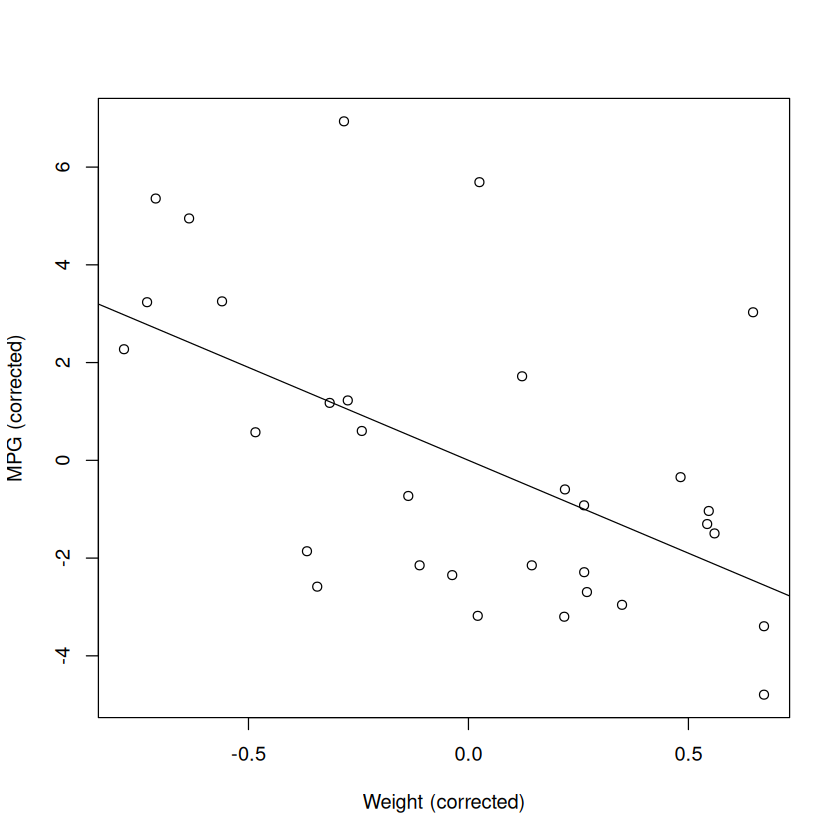

In [12]:
mpg.resid   <- resid(lm(mpg ~ hp + disp, data=mtcars))
wt.resid    <- resid(lm( wt ~ hp + disp, data=mtcars))
add.var.mod <- lm(mpg.resid ~ wt.resid -1) 

plot(x=wt.resid, y=mpg.resid, xlab="Weight (corrected)", ylab="MPG (corrected)")
abline(reg=add.var.mod)

We can continue like this for other predictors, but it is a bit of a pain. Luckily, an easier way is just to use the `avPlots()` function from the `car` package[^car-foot]. For example

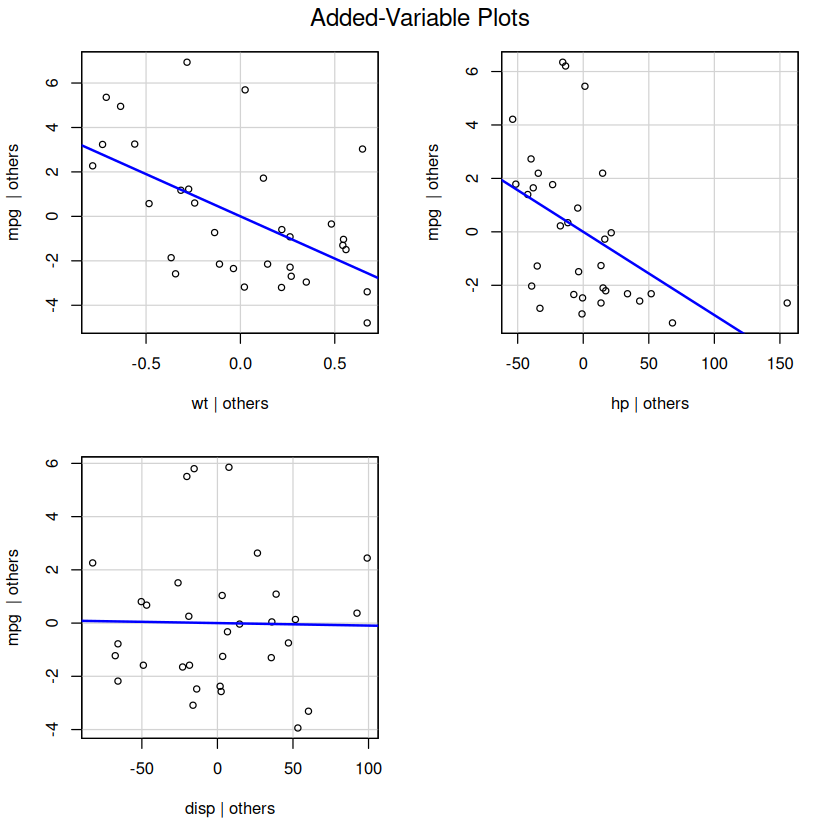

In [13]:
library(car)
avPlots(mod, id=FALSE)

From this we can already see that there appear to be strong relationships between MPG and Weight, and between MPG and Horsepower. However, there appears to be basically no relationship between MPG and Engine Displacement. Notice that this is a very different picture to what we get if we just consider the simple regression of MPG and Engine Displacement.

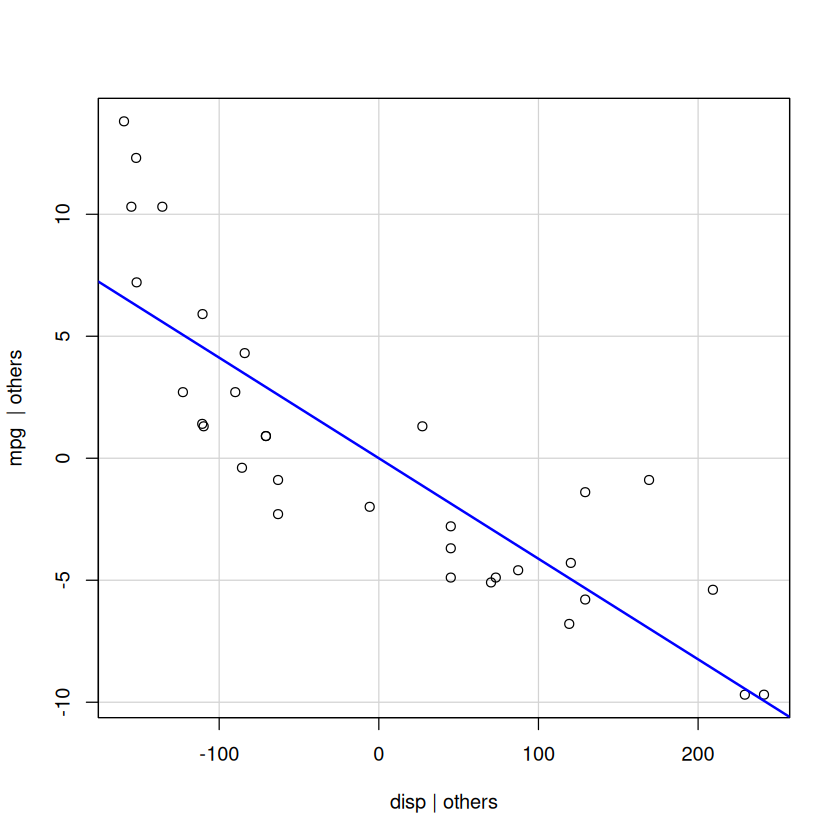

In [14]:
disp.mod <- lm(mpg ~ disp, data=mtcars)
avPlots(disp.mod, id=FALSE)

WOn this basis, just consider how misleading it would be to fit the multiple regression model and then plot effects based on unadjusted simple regression models.

`````{topic} What do you now know?
In this section, we have explored how the simple regression model can be expanded to a multiple regression model by adding more predictor variables. After reading this section, you should have a good sense of:

- How the concept of a straight line in simple regression can be generalised to the concept of a $k$-dimensional plane.
- How the regression equation can be expanded in a simple manner by including additional terms for each new predictor variable.
- How the normal probability model still applies, with the only difference being that the mean of each distribution is associated with a point on the regression plane.
- How parameter estimation still proceeds using either OLS or MLE/REML.
- How the most important distinction with multiple regression is the interpretation of the estimates, as each one reflects the *unique* proportion of variance in the outcome associated with the specific predictor.
- How the `R` output for multiple regression is essentially identical to the simple regression case.
- How visualising individual effects from multiple regression requires the use of *added variable plots*.
`````

[^comma-foot]: Sometimes, to remove ambiguity, a comma is used within the indices. This is omitted when possible because it does make the notation messy. For instance, $x_{32}$ could be misunderstood as the 32nd index of $x$, rather than $i=3$ and $j=2$. However, it is not usual to put double-digits in a single index when writing things down, so usually this can be avoided through context. However, we could write $x_{3,2}$ if we felt this was needed.

[^corner-foot]: Note that there are not really any corners to the plane, as it extends infinitely in all directions.

[^linalg-foot]: All software implementing linear models does so using a linear algebraic perspective that expresses the model using vectors and matrices. This simplifies both the structure of the model and the estimation of the parameters, but is beyond our current scope.

[^car-foot]: In this context, CAR means Companion to Applied Regression and has nothing to do with the fact that our example dataset contains measurements of cars.